In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from pingouin import corr
import dataframe_image as dfi
import seaborn as sns

### Testing how datetime works in pandas

In [2]:
FIFA = pd.read_csv('Career Mode player datasets - FIFA 15-21-Copy1.csv')

In [3]:
FIFA.shape

(18944, 106)

In [4]:
FIFA.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [5]:
pd.options.display.max_columns = 106

In [6]:
pd.get_option("display.max_columns", None)

106

In [7]:
FIFA.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [8]:
FIFA['overall']

0        93
1        92
2        91
3        91
4        91
         ..
18939    47
18940    47
18941    47
18942    47
18943    47
Name: overall, Length: 18944, dtype: int64

In [9]:
FIFA.columns[0:]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [10]:
FIFA.drop(FIFA.columns.difference(['short_name','overall', 'club_name','dob', 'age']), axis=1, inplace=True)

In [11]:
FIFA.head()

,short_name,age,dob,club_name,overall
0,L. Messi,33,1987-06-24,FC Barcelona,93
1,Cristiano Ronaldo,35,1985-02-05,Juventus,92
2,J. Oblak,27,1993-01-07,Atlético Madrid,91
3,R. Lewandowski,31,1988-08-21,FC Bayern München,91
4,Neymar Jr,28,1992-02-05,Paris Saint-Germain,91


### All FIFA 2021 Players

In [12]:
FIFA.describe()

,age,overall
count,18944.000000,18944.000000
mean,25.225823,65.677787
std,4.697354,7.002278
min,16.000000,47.000000
25%,21.000000,61.000000
50%,25.000000,66.000000
75%,29.000000,70.000000
max,53.000000,93.000000


### Converting Month to Categorical Data and Numerical Data

In [13]:
FIFA['dob'] = pd.to_datetime(FIFA['dob'])

In [14]:
FIFA['MonthName'] = FIFA['dob'].dt.month_name()

In [15]:
FIFA['MonthNumber'] = FIFA['dob'].dt.month

In [16]:
FIFA[['short_name', 'dob', 'MonthName', 'MonthNumber']]

,short_name,dob,MonthName,MonthNumber
0,L. Messi,1987-06-24,June,6
1,Cristiano Ronaldo,1985-02-05,February,2
2,J. Oblak,1993-01-07,January,1
3,R. Lewandowski,1988-08-21,August,8
4,Neymar Jr,1992-02-05,February,2
...,...,...,...,...
18939,K. Angulo,1996-04-13,April,4
18940,Zhang Mengxuan,1999-04-26,April,4
18941,Wang Zhenghao,2000-06-28,June,6
18942,Chen Zitong,1997-02-20,February,2


### FIFA 2021 Player Rating

In [17]:
FIFA[['short_name', 'overall']]

,short_name,overall
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91
3,R. Lewandowski,91
4,Neymar Jr,91
...,...,...
18939,K. Angulo,47
18940,Zhang Mengxuan,47
18941,Wang Zhenghao,47
18942,Chen Zitong,47


### FIFA 2021 Player Club Name

In [18]:
FIFA[['short_name', 'club_name']]

,short_name,club_name
0,L. Messi,FC Barcelona
1,Cristiano Ronaldo,Juventus
2,J. Oblak,Atlético Madrid
3,R. Lewandowski,FC Bayern München
4,Neymar Jr,Paris Saint-Germain
...,...,...
18939,K. Angulo,América de Cali
18940,Zhang Mengxuan,Chongqing Dangdai Lifan FC SWM Team
18941,Wang Zhenghao,Tianjin TEDA FC
18942,Chen Zitong,Shijiazhuang Ever Bright F.C.


In [19]:
FIFA.dtypes

short_name             object
age                     int64
dob            datetime64[ns]
club_name              object
overall                 int64
MonthName              object
MonthNumber             int64
dtype: object

In [20]:
FIFA.head()

,short_name,age,dob,club_name,overall,MonthName,MonthNumber
0,L. Messi,33,1987-06-24,FC Barcelona,93,June,6
1,Cristiano Ronaldo,35,1985-02-05,Juventus,92,February,2
2,J. Oblak,27,1993-01-07,Atlético Madrid,91,January,1
3,R. Lewandowski,31,1988-08-21,FC Bayern München,91,August,8
4,Neymar Jr,28,1992-02-05,Paris Saint-Germain,91,February,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'June'),
  Text(1, 0, 'February'),
  Text(2, 0, 'January'),
  Text(3, 0, 'August'),
  Text(4, 0, 'December'),
  Text(5, 0, 'April'),
  Text(6, 0, 'July'),
  Text(7, 0, 'October'),
  Text(8, 0, 'May'),
  Text(9, 0, 'March'),
  Text(10, 0, 'November'),
  Text(11, 0, 'September')])

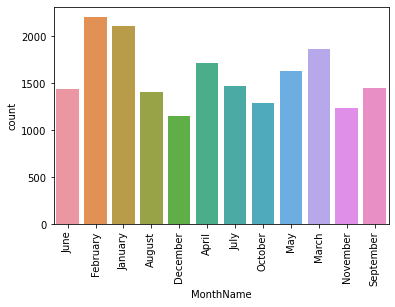

In [21]:
sns.countplot(x='MonthName', data=FIFA)
plt.xticks(rotation=90)

In [22]:
FIFA.groupby('MonthName')['MonthName'].count()

MonthName
April        1712
August       1404
December     1150
February     2204
January      2103
July         1470
June         1435
March        1864
May          1630
November     1239
October      1288
September    1445
Name: MonthName, dtype: int64

In [23]:
monthDist = pd.DataFrame([['January', 2103],
            ['February', 2204],
            ['March', 1864],
            ['April', 1712],
            ['May', 1630],
            ['June', 1435],
            ['July', 1470],
             ['August', 1404],
             ['September', 1445],
             ['October', 1288],
             ['November', 1239],
             ['December', 1150]]
            )

In [24]:
numericMonthDist = pd.DataFrame([[1, 2103],
            [2, 2204],
            [3, 1864],
            [4, 1712],
            [5, 1630],
            [6, 1435],
            [7, 1470],
             [8, 1404],
             [9, 1445],
             [10, 1288],
             [11, 1239],
             [12, 1150]]
            )

In [25]:
monthDist.rename(columns={0: 'Months', 1: 'Total Players'}, inplace=True)

In [26]:
numericMonthDist.rename(columns={0: 'Months', 1: 'Total Players'}, inplace=True)

In [27]:
monthDist.head()

,Months,Total Players
0,January,2103
1,February,2204
2,March,1864
3,April,1712
4,May,1630


In [28]:
numericMonthDist.to_csv('all_monthNumerical.csv')

In [29]:
(monthDist['Total Players'][:3].sum()/monthDist['Total Players'].sum())*100

32.57495777027027

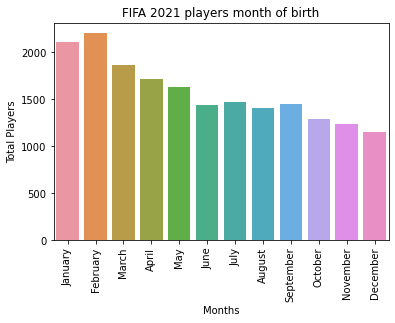

In [30]:
sns.barplot(x='Months', y='Total Players', data=monthDist)
plt.xticks(rotation=90)
plt.title('FIFA 2021 players month of birth')
plt.savefig('Month_Player_Dist.png', dpi=200, bbox_inches='tight')

In [31]:
monthDist.to_csv('AllMonthNameData.csv')

In [32]:
FIFA['MonthNumber'] = FIFA['dob'].dt.month

In [33]:
X=numericMonthDist['Months']
Y=numericMonthDist['Total Players']

Text(1.05, 0.95, '$y=-88.035\\;x+2150.894$\n$R^2 = 0.899$')

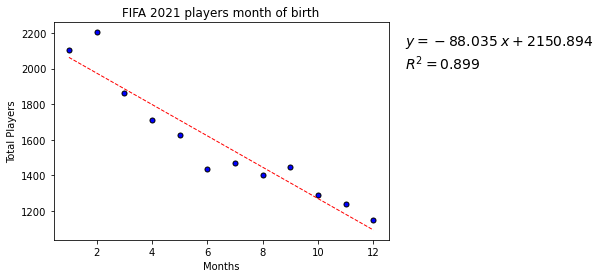

In [34]:
plt.title('FIFA 2021 players month of birth')
plt.ylabel('Total Players')
plt.xlabel('Months')
plt.plot(X,Y,"b.", ms=10, mec="k")
z = np.polyfit(X, Y, 1)
y_hat = np.poly1d(z)(X)

plt.plot(X, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(Y,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
# plt.savefig('FIFA_2021_players_month_of_birth.png', dpi=200, bbox_inches='tight')

In [35]:

dfi.export(numericMonthDist[['Months', 'Total Players']].corr(), 'numericMonthCorr.png')

### Converting Data dob to DayOfYear equivalent

In [36]:
FIFA['DayOfYear'] = FIFA['dob'].dt.dayofyear

In [37]:
FIFA[['short_name', 'dob', 'DayOfYear']]

,short_name,dob,DayOfYear
0,L. Messi,1987-06-24,175
1,Cristiano Ronaldo,1985-02-05,36
2,J. Oblak,1993-01-07,7
3,R. Lewandowski,1988-08-21,234
4,Neymar Jr,1992-02-05,36
...,...,...,...
18939,K. Angulo,1996-04-13,104
18940,Zhang Mengxuan,1999-04-26,116
18941,Wang Zhenghao,2000-06-28,180
18942,Chen Zitong,1997-02-20,51


### Fifa player rating sample

In [38]:
FIFA[['short_name', 'overall']]

,short_name,overall
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91
3,R. Lewandowski,91
4,Neymar Jr,91
...,...,...
18939,K. Angulo,47
18940,Zhang Mengxuan,47
18941,Wang Zhenghao,47
18942,Chen Zitong,47


### All points scatter plot
<p>For observational purposes, I will graph all data points in a scatter plot. It must be acknowledged that there is no inclusion criteria and the data contains several outliers. The mean overall rating of the dataset is a mere <b>65.677787</b> and as expected the mean Day of Year in which FIFA players are born is <b>162.231841</b> which would be roughly<b>June 11th</b>.</p>

In [39]:
X=FIFA['DayOfYear']
Y=FIFA['overall']

Text(1.05, 0.95, '$y=-0.001\\;x+65.760$\n$R^2 = 0.000$')

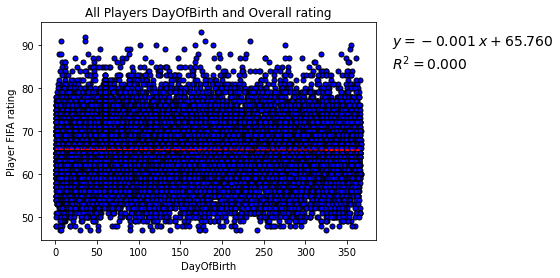

In [40]:
plt.title('All Players DayOfBirth and Overall rating')
plt.ylabel('Player FIFA rating')
plt.xlabel('DayOfBirth')
plt.plot(X,Y,"b.", ms=10, mec="k")
z = np.polyfit(X, Y, 1)
y_hat = np.poly1d(z)(X)

plt.plot(X, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(Y,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
# plt.savefig('CorrelationVOMR.png', dpi=200, bbox_inches='tight')

In [41]:
FIFA.describe()

,age,overall,MonthNumber,DayOfYear
count,18944.000000,18944.000000,18944.000000,18944.000000
mean,25.225823,65.677787,5.835462,162.231841
std,4.697354,7.002278,3.451416,105.104815
min,16.000000,47.000000,1.000000,1.000000
25%,21.000000,61.000000,3.000000,67.000000
50%,25.000000,66.000000,5.000000,151.000000
75%,29.000000,70.000000,9.000000,252.000000
max,53.000000,93.000000,12.000000,366.000000


### Pearson's Correlation
<p>Pearson Correlation varies between -1 and +1. If it is -1 there is a perfect negative lineair relationship, if it is 0 there is no lineair relationship and at +1 there is a perfect positive lineair relationship.

A positive relation means that if one variable goes up, the other also goes up (for example number of ice cream sold versus temperature), a negative relation indicates if one goes down, the other goes up (for example number of winter jackets sold versus temperature).

We can FIFA if Pearson Correlation might be significantly different from 0 in the population. In the example the significance of this FIFA is .000. This is the chance of finding a correlation coefficient of .880 or even higher in a sample, if in the population it would be 0 (no association). This is such a low chance, that we can say that in the population the correlation coefficient will be indeed different from zero, and conclude that there is a significant linear association between the two variables.

To determine the strength we only look at the absolute value (which means to ignore any minus sign, so the absolute value of for example -0.4 is simply 0.4).

Unfortunately there is no formal way to determine if 0.880 is high or low (although almost everyone would agree this is pretty high), and the rules of thumb floating around on the internet vary quite a lot, often depending on the field (e.g. biology, medicine, business, etc.). For example the same rule of thumb sizes from Rea and Parker (1992):</p>
<table>
  <tr>
    <td>|r|</td>
    <td>Strenght</td>
  </tr>
  <tr>
      <td><p>0.00 < 0.10</p></td>
    <td>Negligible</td>
  </tr>
     <tr>
      <td><p>0.10 < 0.20</p></td>
    <td>Weak</td>
  </tr>
     <tr>
      <td><p>0.20 < 0.40</p></td>
    <td>Moderate</td>
  </tr>
     <tr>
      <td><p>0.40 < 0.60</p></td>
    <td>Relatively strong</td>
  </tr>
     <tr>
      <td><p>0.60 < 0.80</p></td>
    <td>Strong</td>
  </tr>
         <tr>
      <td><p>0.80 < 1.00</p></td>
    <td>Very strong</td>
  </tr>
    
</table>

In [42]:
FIFA[['overall', 'DayOfYear']].corr()

,overall,DayOfYear
overall,1.0000,-0.0076
DayOfYear,-0.0076,1.0000


### Trimming Data
<p>For the sample I wil only use players with a FIFA ranking within the 99th percentile range</p>

In [43]:
FIFA['overall'].quantile(.99)

83.0

In [44]:
percentile_99_filter = (FIFA['overall'] >= 83)

In [45]:
FIFA_99th = FIFA.loc[percentile_99_filter]

In [46]:
FIFA_99th.groupby('club_name')['club_name'].count()

club_name
AS Monaco                          1
Ajax                               3
Al Shabab                          1
Arsenal                            3
Atalanta                           3
Athletic Club de Bilbao            2
Atlético Madrid                    7
Bayer 04 Leverkusen                2
Beijing Sinobo Guoan FC            1
Borussia Dortmund                  9
Borussia Mönchengladbach           2
Chelsea                            8
Crystal Palace                     1
Eintracht Frankfurt                2
Everton                            2
FC Barcelona                      15
FC Bayern München                 10
FC Porto                           2
Grêmio                             1
Guangzhou Evergrande Taobao FC     1
Inter                             11
Inter Miami                        2
Juventus                           9
Lazio                              6
Leicester City                     4
Levante UD                         1
Liverpool                   

In [47]:
FIFA_99th.describe()

,age,overall,MonthNumber,DayOfYear
count,212.000000,212.000000,212.000000,212.000000
mean,28.179245,84.962264,5.966981,165.297170
std,3.635781,2.194023,3.472825,106.238359
min,19.000000,83.000000,1.000000,4.000000
25%,26.000000,83.000000,3.000000,76.000000
50%,28.000000,84.000000,5.000000,148.000000
75%,31.000000,86.000000,9.000000,253.000000
max,38.000000,93.000000,12.000000,360.000000


In [48]:
x=FIFA_99th['DayOfYear']
y=FIFA_99th['overall']

Text(1.05, 0.95, '$y=-0.001\\;x+85.202$\n$R^2 = 0.005$')

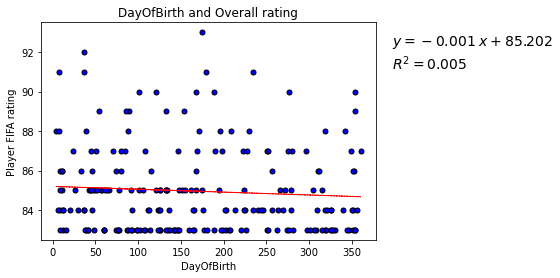

In [49]:
plt.title('DayOfBirth and Overall rating')
plt.ylabel('Player FIFA rating')
plt.xlabel('DayOfBirth')
plt.plot(x,y,"b.", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
# plt.savefig('CorrelationVOMR.png', dpi=200, bbox_inches='tight')

In [50]:
FIFA_99th.describe()

,age,overall,MonthNumber,DayOfYear
count,212.000000,212.000000,212.000000,212.000000
mean,28.179245,84.962264,5.966981,165.297170
std,3.635781,2.194023,3.472825,106.238359
min,19.000000,83.000000,1.000000,4.000000
25%,26.000000,83.000000,3.000000,76.000000
50%,28.000000,84.000000,5.000000,148.000000
75%,31.000000,86.000000,9.000000,253.000000
max,38.000000,93.000000,12.000000,360.000000


In [51]:
FIFA_99th[['overall', 'DayOfYear']].corr()

,overall,DayOfYear
overall,1.000000,-0.070181
DayOfYear,-0.070181,1.000000


Text(0.5, 1.0, 'Distribuition of FIFA 2021 Players within or above the 99th percentile.')

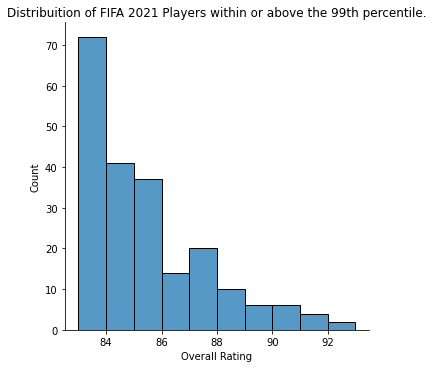

In [52]:
sns.displot(FIFA_99th['overall'])
plt.xlabel('Overall Rating')
sns.set_palette('magma')
plt.title('Distribuition of FIFA 2021 Players within or above the 99th percentile.')

C:\Users\mauri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box and Whisker Plot of FIFA 2021 Players within or above the 99th percentile.')

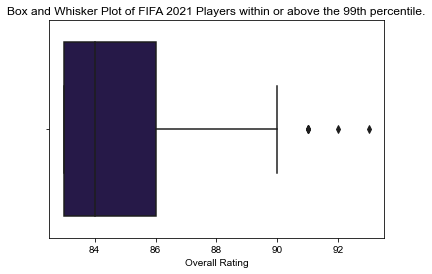

In [53]:
sns.boxplot(FIFA_99th['overall'])
sns.set_style('whitegrid')
sns.set_palette('magma')
plt.xlabel('Overall Rating')
plt.title('Box and Whisker Plot of FIFA 2021 Players within or above the 99th percentile.')

In [54]:
FIFA_99th_SAMPLE = FIFA_99th[['short_name', 'overall', 'MonthNumber', 'MonthName']]

In [55]:
FIFA_99th_SAMPLE

,short_name,overall,MonthNumber,MonthName
0,L. Messi,93,6,June
1,Cristiano Ronaldo,92,2,February
2,J. Oblak,91,1,January
3,R. Lewandowski,91,8,August
4,Neymar Jr,91,2,February
...,...,...,...,...
207,D. Zapata,83,4,April
208,Rafa,83,5,May
209,M. Dúbravka,83,1,January
210,M. Acuña,83,10,October


In [56]:
FIFA_99th_MONTH_ARRAY = FIFA_99th_SAMPLE.groupby('MonthNumber')['MonthNumber'].count()

In [57]:
FIFA_99th_MONTH_ARRAY

MonthNumber
1     19
2     25
3     20
4     18
5     26
6     19
7     14
8     13
9     12
10    12
11    18
12    16
Name: MonthNumber, dtype: int64

In [58]:
FIFA_99th_SAMPLE.groupby('MonthName')['MonthName'].count()

MonthName
April        18
August       13
December     16
February     25
January      19
July         14
June         19
March        20
May          26
November     18
October      12
September    12
Name: MonthName, dtype: int64

In [59]:
MATRIX = pd.DataFrame([[i, val] for i, val in enumerate(FIFA_99th_MONTH_ARRAY)]
                     )

In [60]:
MATRIX.to_csv('p99_monthNumerical.csv')

In [61]:
monthDist99th = pd.DataFrame([['January', 19],
            ['February', 25],
            ['March', 20],
            ['April', 18],
            ['May', 26],
            ['June', 19],
            ['July', 14],
             ['August', 13],
             ['September', 12],
             ['October', 12],
             ['November', 18],
             ['December', 16]]
            )

In [62]:
monthDist99th.rename(columns={0: 'Months', 1: 'Total Players'}, inplace=True)

In [63]:
MATRIX.rename(columns={0: 'Months', 1: 'Total Players'}, inplace=True)

Text(0.5, 1.0, '99th FIFA 2021 Players month of birth')

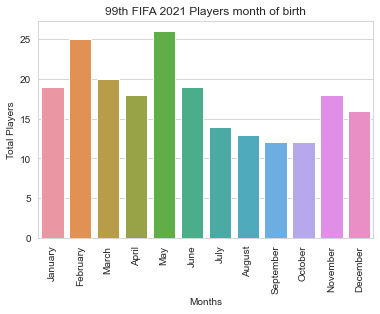

In [64]:
sns.barplot(x='Months', y='Total Players', data=monthDist99th)
plt.xticks(rotation=90)
plt.title('99th FIFA 2021 Players month of birth')
#plt.savefig('Month_Player_Dist.png', dpi=200, bbox_inches='tight')

In [65]:
monthDist99th['Total Players'][:6].sum()

127

In [66]:
(monthDist99th['Total Players'][:6].sum()/monthDist99th['Total Players'].sum())*100

59.905660377358494

In [67]:
monthDist99th.to_csv('99thPercentileMonthNameData.csv')

In [68]:
MATRIX.set_index('Months', inplace=True)

In [69]:
X = MATRIX.index
Y = MATRIX['Total Players']

Text(1.05, 0.95, '$y=-0.790\\;x+22.013$\n$R^2 = 0.381$')

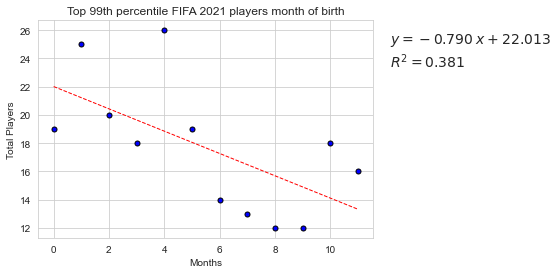

In [70]:
plt.title('Top 99th percentile FIFA 2021 players month of birth')
plt.ylabel('Total Players')
plt.xlabel('Months')
plt.plot(X,Y,"b.", ms=10, mec="k")
z = np.polyfit(X, Y, 1)
y_hat = np.poly1d(z)(X)

plt.plot(X, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(Y,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

In [71]:
MATRIX.reset_index(inplace=True)

In [72]:
dfi.export(MATRIX[['Months', 'Total Players']].corr(), '99thnumericMonthCorr.png')

### Interpreting Results
<p>The sample size containing players rated within the 99th percentile, still, appears broad. We can observe that there is a insignificant correalation between DayOfYear born and overall FIFA rating. The pearson's correlation coefficient of <b>-0.070181</b> represents a negligible negative correlation between the DayOfYear born and overall rating. To interpret the result, it must be noticed that a smaller DayOfYear would represent a player born earlier in the year. Foe example, a player born the 17th of Marth would have the DayOfYear of <b>76</b>.</p><br/>
<p>Therefore, a smaller sample size will be used. I have selected the 2021 Champions league winners, Chelsea, to observe wether a trend can be observed.<p/>



In [98]:
liverpool_filter = (FIFA['club_name'] == 'Liverpool')

In [99]:
lp_df = FIFA.loc[liverpool_filter]

In [94]:
bayer_filter = (FIFA['club_name'] == 'FC Bayern München')

In [95]:
bm_df = FIFA.loc[bayer_filter]

In [73]:
chelsea_filter = (FIFA['club_name'] == 'Chelsea')

In [74]:
ch_df = FIFA.loc[chelsea_filter]

In [75]:

ch_df

,short_name,age,dob,club_name,overall,MonthName,MonthNumber,DayOfYear
27,N. Kanté,29,1991-03-29,Chelsea,88,March,3,88
62,K. Havertz,21,1999-06-11,Chelsea,85,June,6,162
73,T. Werner,24,1996-03-06,Chelsea,85,March,3,66
81,H. Ziyech,27,1993-03-19,Chelsea,85,March,3,78
82,Thiago Silva,35,1984-09-22,Chelsea,85,September,9,266
127,Azpilicueta,30,1989-08-28,Chelsea,84,August,8,240
157,M. Kovačić,26,1994-05-06,Chelsea,83,May,5,126
203,Jorginho,28,1991-12-20,Chelsea,83,December,12,354
218,Kepa,25,1994-10-03,Chelsea,82,October,10,276
280,C. Pulisic,21,1998-09-18,Chelsea,81,September,9,261


In [96]:
bm_df.to_csv('bayernData')

,short_name,age,dob,club_name,overall,MonthName,MonthNumber,DayOfYear
3,R. Lewandowski,31,1988-08-21,FC Bayern München,91,August,8,234
16,M. Neuer,34,1986-03-27,FC Bayern München,89,March,3,86
20,J. Kimmich,25,1995-02-08,FC Bayern München,88,February,2,39
58,T. Müller,30,1989-09-13,FC Bayern München,86,September,9,256
66,L. Sané,24,1996-01-11,FC Bayern München,85,January,1,11
76,S. Gnabry,24,1995-07-14,FC Bayern München,85,July,7,195
102,N. Süle,24,1995-09-03,FC Bayern München,84,September,9,246
104,L. Goretzka,25,1995-02-06,FC Bayern München,84,February,2,37
108,K. Coman,24,1996-06-13,FC Bayern München,84,June,6,165
132,D. Alaba,28,1992-06-24,FC Bayern München,84,June,6,176


In [100]:
lp_df.to_csv('liverpoolData.csv')

In [76]:
xx=ch_df['DayOfYear']
yy=ch_df['overall']

Text(1.05, 0.95, '$y=-0.004\\;x+80.090$\n$R^2 = 0.012$')

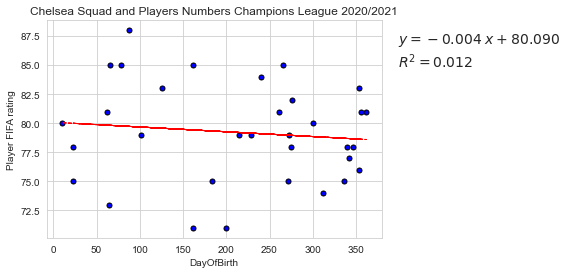

In [77]:
plt.title('Chelsea Squad and Players Numbers Champions League 2020/2021')
plt.ylabel('Player FIFA rating')
plt.xlabel('DayOfBirth')
plt.plot(xx,yy,"b.", ms=10, mec="k")
z = np.polyfit(xx, yy, 1)
y_hat = np.poly1d(z)(xx)

plt.plot(xx, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(yy,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
# plt.savefig('CorrelationVOMR.png', dpi=200, bbox_inches='tight')

In [78]:
ch_df.describe()

,age,overall,MonthNumber,DayOfYear
count,33.000000,33.000000,33.000000,33.000000
mean,25.575758,79.212121,7.575758,213.757576
std,4.437273,4.248217,3.766881,115.373044
min,19.000000,71.000000,1.000000,10.000000
25%,22.000000,76.000000,4.000000,101.000000
50%,25.000000,79.000000,8.000000,240.000000
75%,28.000000,82.000000,11.000000,312.000000
max,38.000000,88.000000,12.000000,362.000000


In [79]:
ch_df.to_csv('ch_df.csv')

In [80]:
ch_df[['overall', 'DayOfYear']].corr()

,overall,DayOfYear
overall,1.000000,-0.111597
DayOfYear,-0.111597,1.000000


### 99.9th Percentille
<p>I will be looking even more specifically of the information for players within 99.9th percentille</p>

In [81]:
FIFA['overall'].quantile(0.999)

88.0

In [82]:
percentile_99_9_filter = (FIFA['overall'] >= 88)

In [83]:
FIFA_99th_9 = FIFA.loc[percentile_99_9_filter]

In [84]:
FIFA_99th_9.groupby('club_name')['club_name'].count()

club_name
Atlético Madrid        1
Chelsea                1
FC Barcelona           2
FC Bayern München      3
Inter                  1
Juventus               2
Liverpool              4
Manchester City        4
Napoli                 1
Paris Saint-Germain    2
Real Madrid            6
Tottenham Hotspur      1
Name: club_name, dtype: int64

In [85]:
FIFA_99th_9

,short_name,age,dob,club_name,overall,MonthName,MonthNumber,DayOfYear
0,L. Messi,33,1987-06-24,FC Barcelona,93,June,6,175
1,Cristiano Ronaldo,35,1985-02-05,Juventus,92,February,2,36
2,J. Oblak,27,1993-01-07,Atlético Madrid,91,January,1,7
3,R. Lewandowski,31,1988-08-21,FC Bayern München,91,August,8,234
4,Neymar Jr,28,1992-02-05,Paris Saint-Germain,91,February,2,36
5,K. De Bruyne,29,1991-06-28,Manchester City,91,June,6,179
6,K. Mbappé,21,1998-12-20,Paris Saint-Germain,90,December,12,354
7,M. ter Stegen,28,1992-04-30,FC Barcelona,90,April,4,121
8,V. van Dijk,28,1991-07-08,Liverpool,90,July,7,189
9,Alisson,27,1992-10-02,Liverpool,90,October,10,276


In [86]:
xxx=FIFA_99th_9['DayOfYear']
yyy=FIFA_99th_9['overall']

Text(1.05, 0.95, '$y=-0.001\\;x+89.584$\n$R^2 = 0.009$')

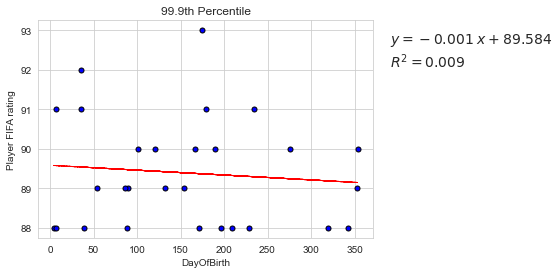

In [87]:
plt.title('99.9th Percentile')
plt.ylabel('Player FIFA rating')
plt.xlabel('DayOfBirth')
plt.plot(xxx,yyy,"b.", ms=10, mec="k")
z = np.polyfit(xxx, yyy, 1)
y_hat = np.poly1d(z)(xxx)

plt.plot(xxx, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(yyy,y_hat):0.3f}$"
plt.gca().text(1.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')

In [88]:
FIFA_99th_9.describe()

,age,overall,MonthNumber,DayOfYear
count,28.000000,28.000000,28.000000,28.000000
mean,28.964286,89.392857,5.607143,155.250000
std,3.327574,1.396803,3.499622,107.315949
min,21.000000,88.000000,1.000000,4.000000
25%,27.000000,88.000000,2.750000,78.000000
50%,28.000000,89.000000,6.000000,160.500000
75%,31.250000,90.000000,7.250000,214.000000
max,35.000000,93.000000,12.000000,354.000000


In [89]:
FIFA_99th_9[['overall', 'DayOfYear']].corr()

,overall,DayOfYear
overall,1.000000,-0.094817
DayOfYear,-0.094817,1.000000


### Key observations?
<b>All FIFA players</b>
<li>Count: 18944</li>
<li>DayOfYear mean: 162.231841/Jun. 11</li>
<li>Overall mean: 65.677787</li>
<li>Corr: -0.0076</li><br/>
<b>FIFA 99th percentile</b>
<li>Count: 212</li>
<li>DayOfYear mean: 165.297170/Jun. 14</li>
<li>Overall mean: 84.962264	</li>
<li>Corr: -0.070181</li><br/>
<b>Chelsea</b>
<li>Count: 33</li>
<li>DayOfYear mean: 213.757576/Aug. 2</li>
<li>Overall mean: 79.212121</li>
<li>Corr: -0.111597</li>
<b>FIFA 99.9th percentile</b>
<li>Count: 28</li>
<li>DayOfYear mean: 155.250000/Jun. 4</li>
<li>Overall mean: 89.392857</li>
<li>Corr: -0.094817</li>

In [91]:
#All
FIFA['age'].mean()

25.22582347972973

In [92]:
#Top 99th Percentile
FIFA_99th['age'].mean()

28.17924528301887

In [93]:
#Chelsea
ch_df['age'].mean()

25.575757575757574